# Your first deep neural network

# imports

In [100]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [127]:
# input_layer = Input((32,32,3))

# x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(input_layer)
# x = BatchNormalization(momentum = 0.6)(x)
# x = LeakyReLU()(x)
# # x = Dropout(rate = 0.5)(x)

# x = Conv2D(filters = 128, kernel_size = 3, strides = 2, padding = 'same')(x)
# x = BatchNormalization(momentum = 0.6)(x)
# x = LeakyReLU()(x)
# # x = Dropout(rate = 0.5)(x)

# x = Conv2D(filters = 256, kernel_size = 3, strides = 2, padding = 'same')(x)
# x = BatchNormalization(momentum = 0.6)(x)
# x = LeakyReLU()(x)
# # x = Dropout(rate = 0.5)(x)

# x = Flatten()(x)

# output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

# model = Model(input_layer, output_layer)

In [128]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.25)(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.25)(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.25)(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.25)(x)

x = Flatten()(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [129]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_69 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_60 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_70 (LeakyReLU)   (None, 16, 16, 32)        0         
__________

# train

In [130]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [131]:
model.layers[2].get_weights()

[]

In [132]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 336s 7ms/step - loss: 1.8282 - acc: 0.3871 - val_loss: 1.4175 - val_acc: 0.4989
Epoch 2/10
50000/50000 [==============================] - 330s 7ms/step - loss: 1.3684 - acc: 0.5122 - val_loss: 1.1874 - val_acc: 0.5725
Epoch 3/10
50000/50000 [==============================] - 330s 7ms/step - loss: 1.2289 - acc: 0.5640 - val_loss: 1.0601 - val_acc: 0.6304
Epoch 4/10
50000/50000 [==============================] - 362s 7ms/step - loss: 1.1280 - acc: 0.6027 - val_loss: 1.0007 - val_acc: 0.6426
Epoch 5/10
50000/50000 [==============================] - 445s 9ms/step - loss: 1.0596 - acc: 0.6264 - val_loss: 1.0033 - val_acc: 0.6491
Epoch 6/10
50000/50000 [==============================] - 447s 9ms/step - loss: 1.0175 - acc: 0.6458 - val_loss: 0.9079 - val_acc: 0.6821
Epoch 7/10
50000/50000 [==============================] - 442s 9ms/step - loss: 0.9731 - acc: 0.6574 - val_loss: 0.9470 - 

In [108]:
model.layers[6].get_weights()

[array([0.96023625, 1.0363294 , 0.9807387 , 0.9356765 , 1.0121671 ,
        0.9473878 , 1.0066526 , 1.0009254 , 0.9982277 , 1.087719  ,
        0.9212615 , 0.9379336 , 0.9902715 , 1.0315461 , 0.9945381 ,
        1.0610253 , 1.0414884 , 0.99314314, 1.0269263 , 0.9872436 ,
        0.9641181 , 1.0010475 , 0.9668784 , 1.0327625 , 1.0170848 ,
        1.0142869 , 1.0092481 , 0.9845155 , 0.9843551 , 0.92236805,
        0.98142874, 0.9626884 ], dtype=float32),
 array([-0.02627409, -0.10376667, -0.12798727, -0.12734899, -0.14115468,
        -0.15232714, -0.12181854, -0.18183869, -0.14609051, -0.16409718,
        -0.11551003, -0.13012198, -0.00120563,  0.00462373, -0.08708022,
        -0.06935041, -0.16653018, -0.03715561, -0.16693728, -0.15389696,
        -0.11686924, -0.12118189, -0.09051432, -0.06333148, -0.00601734,
        -0.17442344, -0.11044028, -0.04899298, -0.18829457, -0.11255743,
        -0.04444654, -0.10859493], dtype=float32),
 array([-0.03491527, -0.06019443,  0.11761849,  0.1774

In [98]:
model.layers[2].get_weights()

[array([0.9855539 , 0.98191184, 1.0046718 , 0.9100663 , 0.8648817 ,
        1.0806478 , 0.88663334, 1.116929  , 1.1563014 , 1.0545433 ,
        0.9731756 , 0.9890276 , 0.9955371 , 0.9244324 , 1.0700394 ,
        0.96745557, 0.9336972 , 0.91290843, 0.9346438 , 1.0059366 ,
        1.04888   , 1.0836891 , 0.9898577 , 1.187397  , 1.0024608 ,
        1.0302579 , 0.9887904 , 0.9116215 , 1.0183758 , 0.8473211 ,
        0.98928225, 1.0414029 ], dtype=float32),
 array([ 0.03632129,  0.06539085,  0.09228589, -0.01229329, -0.07527646,
        -0.07982633, -0.08575702, -0.10171105, -0.13137227,  0.00992267,
        -0.08176795,  0.08255444,  0.07250648, -0.09152898, -0.00668784,
        -0.03126333, -0.09848061, -0.04986136, -0.05935244,  0.13635218,
        -0.02506301,  0.01103865, -0.03896356,  0.11148709,  0.02541374,
        -0.01907211, -0.1000978 , -0.06584053, -0.01523877, -0.08714308,
        -0.06030862,  0.05572646], dtype=float32),
 array([ 0.04870428,  0.05389167, -0.02156077,  0.1835

In [99]:
model.layers[5].get_weights()

[array([0.96332777, 0.9769169 , 1.0154247 , 0.9666193 , 1.0125179 ,
        0.99544936, 0.9963902 , 1.069776  , 0.9936511 , 1.0833335 ,
        1.0353159 , 0.98148376, 1.0415381 , 0.94602484, 0.96089685,
        0.91048217, 1.0184244 , 0.9483053 , 0.9852649 , 0.9871728 ,
        0.9547579 , 0.98832697, 0.9870017 , 0.90329665, 0.98994195,
        1.0659714 , 1.1107982 , 1.0419027 , 1.1142759 , 0.9904282 ,
        0.9221588 , 0.94726866], dtype=float32),
 array([-0.08815964, -0.04769891, -0.03945689, -0.07706118, -0.04529361,
        -0.07930985, -0.01018162, -0.03203715, -0.107008  , -0.03442697,
        -0.00416261, -0.11603774, -0.05991107, -0.04187099, -0.14505829,
        -0.08478508, -0.06066632, -0.07637219, -0.08144677, -0.04537421,
        -0.07250194, -0.0894914 , -0.08296932, -0.14686984, -0.05169854,
        -0.02660714,  0.04038198, -0.03534164, -0.02851598, -0.02252645,
        -0.16034105, -0.06557512], dtype=float32),
 array([-0.03838704, -0.8758092 , -0.04313361, -0.0372

In [96]:
model.layers[5].get_weights()

[array([0.9769379 , 0.9949176 , 1.0022665 , 1.0054618 , 0.9652536 ,
        1.0007536 , 0.9956323 , 1.0172541 , 1.0071003 , 1.0049151 ,
        0.99717236, 1.0067313 , 1.0160052 , 0.98545945, 0.9952756 ,
        0.9706081 , 1.0241039 , 0.9841055 , 0.9895376 , 0.99303055,
        0.9859816 , 1.0018865 , 1.0038335 , 0.95962995, 0.9947349 ,
        1.0262029 , 1.047995  , 1.0302856 , 1.0369878 , 1.0029478 ,
        0.96228224, 0.9858124 ], dtype=float32),
 array([-1.35157993e-02, -3.31382244e-03,  4.44525795e-05, -1.98394582e-02,
        -3.11284270e-02, -1.38022825e-02, -2.13475022e-02,  1.22610005e-02,
        -4.01355736e-02, -9.94086266e-03, -4.28228406e-03, -4.07766961e-02,
         2.29579717e-04, -4.88898577e-03, -3.53441425e-02, -2.18901988e-02,
        -1.03145128e-03, -2.46613789e-02, -2.10269447e-02, -1.52905863e-02,
        -3.73819284e-02, -7.26112723e-03, -1.62337702e-02, -4.28374596e-02,
        -1.54864704e-02, -3.07171070e-03,  2.11529918e-02, -1.55762006e-02,
        -4.

# analysis

In [133]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 25s 2ms/step


[1.143199872970581, 0.6074999988079071]

In [111]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

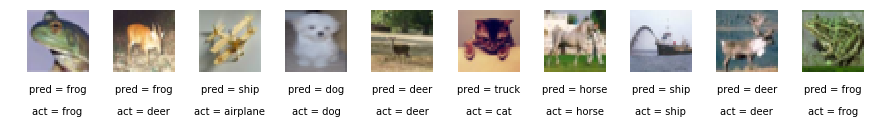

In [115]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
